In [1]:
import pandas as pd
from konlpy.tag import Okt
from gensim.models import word2vec
import nltk # national language tool kit
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np  
import re
t = Okt()

[0.007s][warning][os,thread] Attempt to protect stack guard pages failed (0x000000016d748000-0x000000016d754000).
[0.007s][warning][os,thread] Attempt to deallocate stack guard pages failed.


In [2]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [3]:
# train_data불러오기
train = pd.read_csv("../../Data/lstm_170.csv")

In [4]:
results = set()
train.가사.str.split().apply(results.update)
vocab_size = len(results)
vocab_size

13115

---
# happy 형태소 분리

In [5]:
# 가사만 리스트에 넣기
happy_list = []
for i in range(0, 170):
    happy_list.append(train['가사'][i])

In [6]:
# 정규식 (특수문자 제거 작업)
lyric_text = []
for i in range(0,170):
   text = re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]'," ",happy_list[i],count=1)
   text_1 = re.sub('[^가-힣]'," ",text)
   text_2 = ' '.join(text_1.split())
   
   lyric_text.append(text_2)
len(lyric_text)

170

In [7]:
# 텍스를 한 줄씩 처리하기
twitter = Okt()
results1 = []
lines = lyric_text
for line in lines:
    train_malist = twitter.pos(line, norm=True,stem=True) # 단어의 기본형 사용
    r = []
    for word in train_malist:
        # 어미, 조사, 구두점 등은 대상에서 제외
        if not word[1] in ["Josa","Eomi","Punctuation",'Alpha']:
            if word[0] != "n":
                r.append(word[0]) # word[0] : data
    rl_h = (" ".join(r).strip())
    
    results1.append(rl_h)
    # print(rl_h)

In [8]:
token_h = str(results1).split(" ")
# token_h

In [65]:
# 불용어 추가
stop_words_happy = ["하다',","'그대","모르다',"]
token_happy = [each_word for each_word in token_h if each_word not in stop_words_happy]


In [66]:
# 상위 100개 단어 확인
ko_h = nltk.Text(token_happy)
ko_h.vocab().most_common(500)

[('하다', 823),
 ('내', 669),
 ('너', 637),
 ('나', 464),
 ('있다', 405),
 ('사랑', 338),
 ('그', 304),
 ('이', 275),
 ('그대', 271),
 ('말', 266),
 ('난', 249),
 ('날', 215),
 ('보다', 206),
 ('없다', 197),
 ('같다', 181),
 ('널', 177),
 ('않다', 172),
 ('맘', 165),
 ('네', 154),
 ('싶다', 144),
 ('마음', 143),
 ('눈', 142),
 ('수', 139),
 ('더', 132),
 ('되다', 127),
 ('넌', 127),
 ('우리', 124),
 ('것', 119),
 ('내다', 118),
 ('알다', 117),
 ('다', 111),
 ('들', 106),
 ('나르다', 104),
 ('해', 102),
 ('돼다', 102),
 ('걸', 99),
 ('니', 98),
 ('좋다', 97),
 ('모르다', 97),
 ('때', 96),
 ('주다', 94),
 ('너무', 93),
 ('곁', 93),
 ('지금', 92),
 ('왜', 91),
 ('못', 91),
 ('다시', 89),
 ('속', 88),
 ('오다', 87),
 ('세상', 82),
 ('밤', 81),
 ('젠', 81),
 ('두', 79),
 ('기억', 75),
 ('어떻다', 74),
 ('또', 74),
 ('대다', 73),
 ('생각', 73),
 ('잊다', 70),
 ('시간', 69),
 ('아니다', 67),
 ('안', 67),
 ('오늘', 67),
 ('일', 67),
 ('모든', 67),
 ('알', 66),
 ('하나', 64),
 ('버리다', 63),
 ('이제', 62),
 ('눈물', 62),
 ('가다', 62),
 ('말다', 61),
 ('이렇다', 61),
 ('뿐', 60),
 ('손', 59),
 ('사람', 58),
 ('없이'

In [67]:
len(ko_h.vocab())

2224

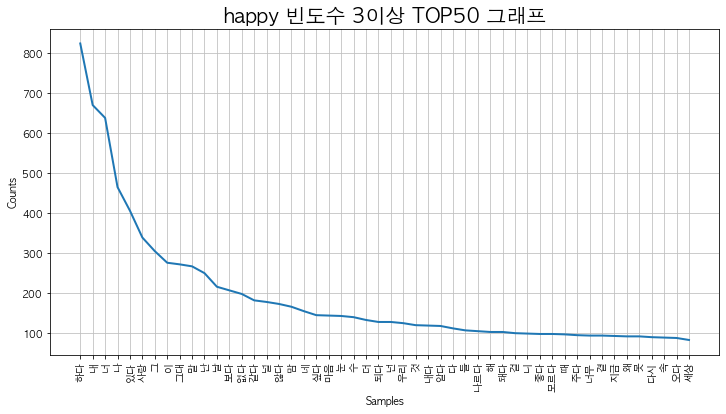

In [68]:
# 상위 50개의 빈도수 차트 만들기
plt.figure(figsize=(12,6))
plt.title("happy 빈도수 3이상 TOP50 그래프", size =20)
ko_h.plot(50)
plt.show()

In [69]:
# #워드클라우드의 모양 설정. 동사이미지 가져오기
# import numpy as np
# from PIL import *
# cand_mask=np.array(Image.open('../../Data/image/동사2.png'))

In [70]:
# 상위 200개만 wordcloud로 그리기
# 구한데이터로 그리기
data3 = ko_h.vocab().most_common(300)

# 딕셔너리로 만들기
tmp_data3 = dict(data3)

wordcloud3 = WordCloud(
   background_color='White',
    colormap= 'copper', # 글씨색은 ('copper','ocean','summer')
    # mask=cand_mask, # 워드클라우드 모양 설정
    relative_scaling=0.3,
    font_path="AppleGothic" 
).generate_from_frequencies(tmp_data3)

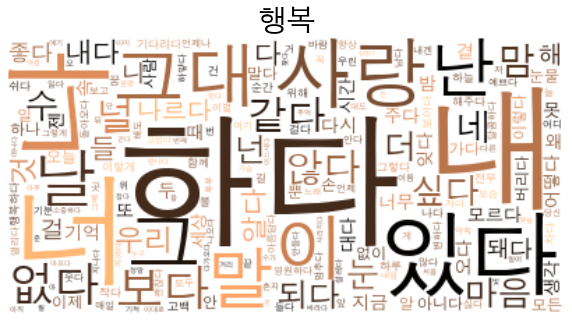

In [71]:
plt.figure(figsize=(10,8))
plt.title("행복", size =30, weight = 'bold')
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.show()


### 추출한 happy 토큰 확인하기

In [72]:
# 동사 토큰
# print("동사토큰 : \n",list(ko_h.vocab()))
print(" => 동사 토큰 갯수 : ",len(list(ko_h.vocab())))

 => 동사 토큰 갯수 :  2224


In [73]:
token_happy = list(ko_h.vocab())

---
# sad

In [74]:
# 가사만 리스트에 넣기
sad_list = []
for i in range(170, 340):
    sad_list.append(train['가사'][i])

In [75]:
# 정규식 (특수문자 제거 작업)
lyric_text_sad = []
for i in range(0,170):
   text = re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]'," ",sad_list[i],count=1)
   text_1 = re.sub('[^가-힣]'," ",text)
   text_2 = ' '.join(text_1.split())
   
   lyric_text_sad.append(text_2)
len(lyric_text_sad)

170

In [76]:
# lyric_text_sad

In [77]:
# 텍스를 한 줄씩 처리하기
twitter = Okt()
results2 = []
lines = lyric_text_sad
for line in lines:
    train_malist = twitter.pos(line,norm=True,stem=True) # 단어의 기본형 사용
    r = []
    for word in train_malist:
        # 어미, 조사, 구두점 등은 대상에서 제외
        if not word[1] in ["Josa","Eomi","Punctuation",'Alpha']:
            if word[0] != "n":
                r.append(word[0]) # word[0] : data
    rl_s = (" ".join(r).strip())
    
    results2.append(rl_s)

In [78]:
token_s = str(results2).split(" ")
# token_s

In [79]:
# 불용어 추가
stop_words_sad = []
token_sad = [each_word for each_word in token_s if each_word not in stop_words_sad]


In [80]:
# 상위 100개 단어 확인
ko_s = nltk.Text(token_sad)
ko_s.vocab().most_common(500)

[('하다', 1087),
 ('너', 677),
 ('사랑', 603),
 ('내', 577),
 ('나', 418),
 ('있다', 381),
 ('그', 377),
 ('없다', 371),
 ('말', 318),
 ('보다', 314),
 ('날', 301),
 ('널', 291),
 ('그대', 261),
 ('난', 236),
 ('않다', 213),
 ('이', 207),
 ('수', 198),
 ('못', 180),
 ('같다', 172),
 ('싶다', 170),
 ('우리', 168),
 ('사람', 165),
 ('네', 165),
 ('아프다', 164),
 ('것', 158),
 ('다시', 150),
 ('더', 147),
 ('들', 141),
 ('걸', 138),
 ('너무', 128),
 ('잊다', 127),
 ('니', 124),
 ('모르다', 123),
 ('생각', 122),
 ('나르다', 120),
 ('되다', 119),
 ('그렇다', 119),
 ('또', 114),
 ('눈물', 112),
 ('맘', 112),
 ('오다', 112),
 ('마음', 110),
 ('내다', 107),
 ('시간', 107),
 ('다', 106),
 ('왜', 106),
 ('기억', 104),
 ('돼다', 101),
 ('알다', 101),
 ('좋다', 99),
 ('해', 96),
 ('어떻다', 96),
 ('나다', 96),
 ('해주다', 96),
 ('안', 93),
 ('때', 93),
 ('만나다', 92),
 ('기다리다', 92),
 ('하루', 89),
 ('아니다', 88),
 ('이렇게', 87),
 ('알', 86),
 ('떠나다', 85),
 ('가다', 85),
 ('가슴', 84),
 ('버리다', 81),
 ('이제', 81),
 ('웃다', 80),
 ('혼자', 78),
 ('거', 77),
 ('이다', 76),
 ('오늘', 75),
 ('보내다', 72),
 ('모든', 71),


In [81]:
len(ko_s.vocab())

2274

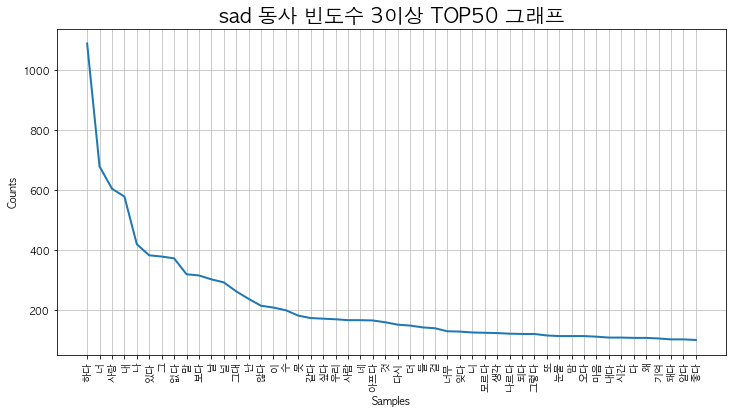

In [82]:
# sad 상위 50개의 빈도수 차트 만들기
plt.figure(figsize=(12,6))
plt.title("sad 동사 빈도수 3이상 TOP50 그래프", size =20)
ko_s.plot(50)
plt.show()

In [83]:
# #워드클라우드의 모양 설정. 동사이미지 가져오기
# import numpy as np
# from PIL import *
# cand_mask=np.array(Image.open('../../Data/image/동사2.png'))

In [84]:
# 상위 200개만 wordcloud로 그리기
# 구한데이터로 그리기
data3 = ko_s.vocab().most_common(300)

# 딕셔너리로 만들기
tmp_data3 = dict(data3)

wordcloud3 = WordCloud(
   background_color='White',
    colormap= 'copper', # 글씨색은 ('copper','ocean','summer')
    # mask=cand_mask, # 워드클라우드 모양 설정
    relative_scaling=0.3,
    font_path="AppleGothic" 
).generate_from_frequencies(tmp_data3)

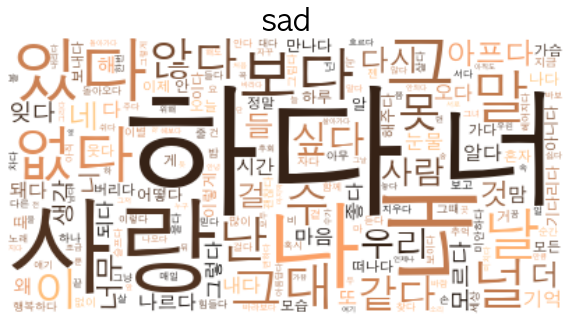

In [85]:
plt.figure(figsize=(10,8))
plt.title("sad", size =30, weight = 'bold')
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.show()

### 추출한 sad 토큰 확인하기

In [86]:
# sad 동사 토큰
# print("토큰 : \n",list(ko_s.vocab()))
print("=>토큰 갯수 : ",len(list(ko_s.vocab())))

=>토큰 갯수 :  2274


In [87]:
token_sad = list(ko_s.vocab())

---
# indifference

In [88]:
# 가사만 리스트에 넣기
indifference_list = []
for i in range(340, 510):
    indifference_list.append(train['가사'][i])

In [89]:
# 정규식 (특수문자 제거 작업)
lyric_text_indifference = []
for i in range(0,170):
   text = re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]'," ",indifference_list[i],count=1)
   text_1 = re.sub('[^가-힣]'," ",text)
   text_2 = ' '.join(text_1.split())
   
   lyric_text_indifference.append(text_2)
len(lyric_text)

170

In [90]:
# lyric_text_indifference

In [91]:
# 텍스를 한 줄씩 처리하기
twitter = Okt()
results4 = []
lines = lyric_text_indifference
for line in lines:
    train_malist = twitter.pos(line,norm=True,stem=True) # 단어의 기본형 사용
    r = []
    for word in train_malist:
        # 어미, 조사, 구두점 등은 대상에서 제외
        if not word[1] in ["Josa","Eomi","Punctuation",'Alpha']:
            if word[0] != "n":
                r.append(word[0]) # word[0] : data
    rl_i = (" ".join(r).strip())
    
    results4.append(rl_i)

In [92]:
token_i = str(results4).split(" ")
# token_i

In [93]:
# 불용어 추가
stop_words_indifference = ["['먼"]
token_indifference = [each_word for each_word in token_i if each_word not in stop_words_indifference]


In [94]:
# 상위 100개 단어 확인
ko_i = nltk.Text(token_indifference)
ko_i.vocab().most_common(500)

[('하다', 629),
 ('그대', 537),
 ('내', 479),
 ('있다', 356),
 ('그', 350),
 ('나', 291),
 ('사랑', 279),
 ('들', 255),
 ('날', 253),
 ('이', 240),
 ('우리', 224),
 ('없다', 219),
 ('밤', 212),
 ('너', 201),
 ('수', 192),
 ('보다', 179),
 ('난', 176),
 ('같다', 159),
 ('오늘', 152),
 ('않다', 149),
 ('내다', 139),
 ('기억', 131),
 ('오다', 127),
 ('눈', 127),
 ('더', 126),
 ('못', 123),
 ('마음', 121),
 ('것', 120),
 ('길', 120),
 ('가다', 117),
 ('되다', 116),
 ('곳', 115),
 ('때', 112),
 ('나르다', 111),
 ('다시', 110),
 ('꿈', 105),
 ('싶다', 101),
 ('저', 98),
 ('시간', 98),
 ('말', 97),
 ('손', 96),
 ('맘', 91),
 ('함께', 86),
 ('속', 86),
 ('또', 83),
 ('바람', 82),
 ('하늘', 80),
 ('대다', 80),
 ('그렇다', 79),
 ('만나다', 78),
 ('곁', 76),
 ('모습', 75),
 ('없이', 75),
 ('끝', 75),
 ('기다리다', 74),
 ('다', 73),
 ('찾다', 73),
 ('버리다', 73),
 ('아름답다', 71),
 ('노래', 70),
 ('아', 66),
 ('나다', 65),
 ('안', 65),
 ('내리다', 65),
 ('추억', 64),
 ('순간', 64),
 ('닿다', 64),
 ('걸', 63),
 ('꽃', 62),
 ('사람', 60),
 ('잊다', 60),
 ('곱다', 59),
 ('세상', 58),
 ('좋다', 58),
 ('눈물', 57),
 ('떠나다', 5

In [95]:
len(ko_i.vocab())

2452

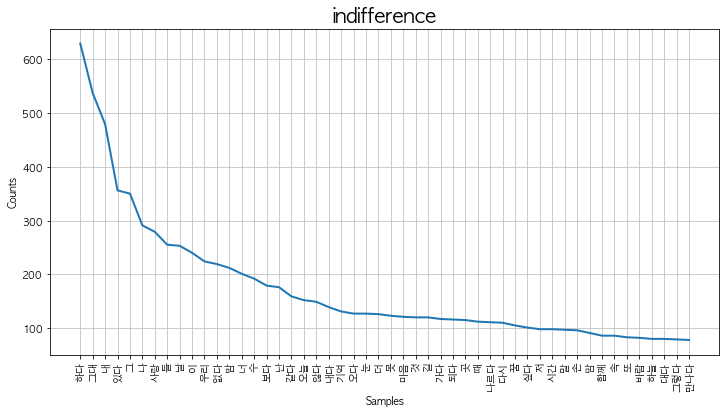

In [96]:
# indifference 상위 50개의 빈도수 차트 만들기
plt.figure(figsize=(12,6))
plt.title("indifference", size =20)
ko_i.plot(50)
plt.show()

In [97]:
# 상위 200개만 wordcloud로 그리기
# 구한데이터로 그리기
data4 = ko_i.vocab().most_common(300)

# 딕셔너리로 만들기
tmp_data4 = dict(data3)

wordcloud4 = WordCloud(
   background_color='White',
    colormap= 'copper', # 글씨색은 ('copper','ocean','summer')
    # mask=cand_mask, # 워드클라우드 모양 설정
    relative_scaling=0.3,
    font_path="AppleGothic" 
).generate_from_frequencies(tmp_data4)

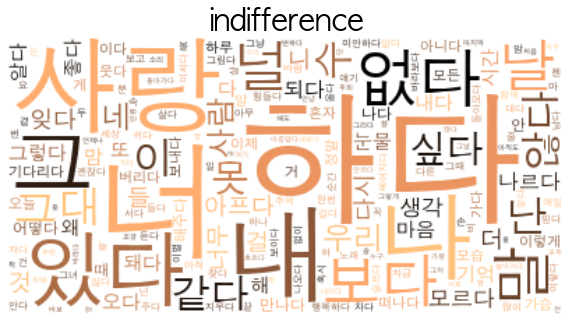

In [98]:
plt.figure(figsize=(10,8))
plt.title("indifference", size =30, weight = 'bold')
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis('off')
plt.show()

### 추출한 indifference 토큰 확인하기

In [99]:

# print("토큰 : \n",list(ko_i.vocab()))
print(" =>토큰 갯수 : ",len(list(ko_i.vocab())))

 =>토큰 갯수 :  2452


In [100]:
token_indifference = list(ko_i.vocab())

---
# 벤다이어그램 시각화

In [101]:
# pip install venn

In [102]:
# 벤다이어 그램 설치 필요
%matplotlib inline

import venn

In [103]:
labels = venn.get_labels([
           set(token_happy), set(token_sad), set(token_indifference)
        ])
print(labels)


{'001': '879 ', '010': '648 ', '011': '299 ', '100': '655 ', '101': '242 ', '110': '295 ', '111': '1032 '}


In [104]:
import warnings
warnings.filterwarnings("ignore")

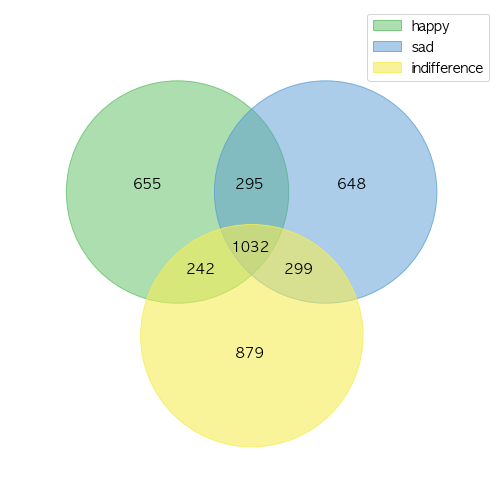

In [105]:
fig, ax = venn.venn4(labels, names=['happy', 'sad','indifference'])
fig.show()

In [106]:
# 벤다이어 그램에서 제거한 결과단어 확인하기
set1 = set(token_happy) - set(token_sad) - set(token_indifference)
set2 = set(token_sad) - set(token_indifference)- set(token_happy)
set3 = set(token_indifference)- set(token_happy) - set(token_sad)
print(len(set1),"\n",set(token_happy)-set1,"\n\n")
print(len(set2),"\n",set(token_sad)-set2,"\n\n")
print(len(set3),"\n",set(token_indifference)-set3,"\n\n")


655 
 {'있다', '잠시', '내뱉다', '크다', '서도', '오다', '제일', '행동', '하', '등', '초조하다', '오오', '깨우다', '보고', '두다', '뜻', '뜨겁다', '일찍', '어루만지다', '목', '사실', "'우리", '듯', '아쉽다', '드네', '웃', '아', '친구', '힘들다', '써다', '눈부심', '서두르다', '결국', '새롭다', '왠지', '떠올리다', '막히다', '남친', '애', '걱정', '따라오다', '널', '떠나다', '겨울', '평범하다', '그땐', '전쟁', '속상하다', '한잔', '누군가', '얼굴', '울리다', '오래전', '그림자', '낙서', '지겹다', '거란', '보채다', '하나로', '간직', '헤매다', '놔두다', '쏟아내다', '안개', '되돌리다', '뎌', '골목', '자연스레', '창가', '많다', '낙원', '들려오다', '제', '길이', '오늘밤', '멀다', '틈', '구', '더', '생일', '식당', '반짝', '우산', '시들다', '발걸음', '키', '시선', "이',", '없다', '물든', '하늘', '넌', '나쁘다', '괴롭히다', '잖다', '지', '뿐', "걸',", '어깨', '굳다', '빠져들다', '생각나다', "'나", "'뭐", '결말', '나오다', '갇히다', '바로', '자장가', '다행', '떼다', '맹세', '늘다', '푸른빛', '기억', '살아오다', '걸다', '토라', '노랗다', '온통', '천장', '재미있다', '젖다', '란', '어두워지다', '그것', '커다랗다', '대란', '예', '투명하다', '감싸다', '쏟아지다', '어지르다', '그냥', '라디오', '멍', '혹시', '너', '짧다', '놓다', '다', '보내다', '맛', '어울리다', '정도', '하루하루', '어지럽다', '운명', '눈', '단어', '여', '불면', '떠들다', '길거리', '한강', '시',

### 중복 제거한 happy 1글자 이하 지우기

In [107]:
happy = list(set1)
# print(happy)

In [108]:
# 한글자 0 값 넣기
for i in range(len(happy)):
    if len(happy[i]) <= 1:
        happy[i] = 0
    else:
        happy[i] = happy[i]

In [109]:
# print(happy)

In [110]:
# 0 값 지우기
remove_set = {0}

happy = [i for i in happy if i not in remove_set]
len(happy)

609

### 중복 제거한 sad 1글자 이하 지우기

In [111]:
sad = list(set2)
# print(sad)

In [112]:
# 한글자 0 값 넣기
for i in range(len(sad)):
    if len(sad[i]) <= 1:
        sad[i] = 0
    else:
        sad[i] = sad[i]
# print(sad)

In [113]:
# 0 값 지우기
remove_set = {0}

sad = [i for i in sad if i not in remove_set]
len(sad)

610

### 중복 제거한 indifference 1글자이하 지우기

In [114]:
indifference = list(set3)
# print(indifference)

In [115]:
# 한글자 0 값 넣기
for i in range(len(indifference)):
    if len(indifference[i]) <= 1:
        indifference[i] = 0
    else:
        indifference[i] = indifference[i]
# print(indifference)

In [116]:
# 0 값 지우기
remove_set = {0}

indifference = [i for i in indifference if i not in remove_set]
len(indifference)

809

# 토큰 합치기

In [138]:
# 정규식 (특수문자 제거 작업)
lyric_text = []
for i in range(len(happy)):
   text = re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]'," ",happy[i],count=1)
   text_1 = re.sub('[^가-힣]'," ",text)
   text_2 = ' '.join(text_1.split())
   
   lyric_text.append(text_2)
lyric_text

['로부터',
 '상위',
 '어지러워지다',
 '어두컴컴하다',
 '기척',
 '파티',
 '한동안',
 '애교',
 '웅크리다',
 '깜빡',
 '한가지',
 '왼손',
 '약지',
 '군대',
 '별자리',
 '달이',
 '뚜뚜뚜',
 '종잇조각',
 '잊다',
 '찢기다',
 '발견',
 '우',
 '목말',
 '불투명하다',
 '이어도',
 '본체',
 '순진하다',
 '솜사탕',
 '밥집',
 '아예',
 '유혹',
 '어루어',
 '삼다',
 '어리광',
 '내려다보다',
 '되돌리기',
 '내자',
 '화살',
 '마저',
 '꽁꽁',
 '파노라마',
 '넘어오다',
 '화풀',
 '발짝',
 '틀리다',
 '욕망',
 '우주',
 '꿈',
 '세레나데',
 '심야',
 '등대',
 '로맨틱',
 '절대로',
 '필름',
 '지긋지긋하다',
 '급하다',
 '달싹',
 '위험',
 '옥상',
 '불쌍하다',
 '어랏',
 '땋아',
 '마루',
 '기적처럼',
 '영영',
 '왜',
 '샤르르르',
 '알아주다',
 '나야',
 '곳',
 '끊임없다',
 '또박또박',
 '알아채다',
 '단조롭다',
 '다가오다',
 '정적',
 '문턱',
 '먹구름',
 '피난처',
 '매력',
 '벼랑',
 '좌표',
 '바구니',
 '사르',
 '매우',
 '기차',
 '해드리다',
 '설기',
 '두루',
 '과장',
 '환상',
 '만족',
 '며칠',
 '풀이',
 '호의',
 '여지',
 '배신',
 '아마',
 '필수',
 '잠결',
 '달력',
 '키',
 '끝없이',
 '조심조심',
 '졸업',
 '주옥',
 '감옥',
 '단두대',
 '자동차',
 '린다',
 '순수',
 '바탕',
 '어차피',
 '그날',
 '칠전팔기',
 '린단',
 '뚝섬',
 '덕분',
 '가트',
 '랄라라',
 '삶속',
 '이쯤',
 '더',
 '견우',
 '도리어',
 '구르다',
 '그러다가',
 '버튼',
 '숙취',
 '초콜릿',
 '여보세요',
 '사인

In [141]:
happy_text = ""
for i in range(len(lyric_text)):
    happy_text += happy[i]+" "
happy_text

"로부터 상위 어지러워지다 어두컴컴하다 기척 파티 '한동안 애교 웅크리다 깜빡 한가지 왼손 약지 군대 별자리 '달이 뚜뚜뚜 종잇조각 잊다', 찢기다 발견 우', '목말 불투명하다 이어도 본체 순진하다 솜사탕 밥집 아예 유혹 어루어 삼다 어리광 내려다보다 되돌리기 내자 화살 마저 꽁꽁 파노라마 넘어오다 화풀 발짝 틀리다 욕망 우주', '꿈 세레나데 심야 등대 로맨틱 '절대로 필름 지긋지긋하다 급하다 달싹 위험 옥상 불쌍하다 어랏 땋아 '마루 기적처럼 영영 '왜 샤르르르 알아주다', 나야 곳', 끊임없다 또박또박 알아채다', 단조롭다 다가오다', 정적 문턱 먹구름 피난처 매력 벼랑 좌표 바구니 사르 매우 기차 해드리다 설기 두루 과장 환상 만족 며칠 풀이 호의 여지 배신 아마', 필수 잠결 달력 '키 '끝없이 조심조심 졸업 주옥 '감옥 단두대 자동차 린다 순수 바탕 '어차피 그날', 칠전팔기 린단 뚝섬 덕분 가트 랄라라 삶속 이쯤 '더 견우 도리어 구르다 그러다가 버튼 숙취 '초콜릿 여보세요', 사인 큐피트 하든 틀어박히다 부모님 '입 적당하다 반전 비정하다 여자친구 무참 '겁 대안 가보다', '기억나다 차비 지적 불씨 춘천 '없다 뚜벅뚜벅 랄랄 취하 라랄 힘껏 늘어서다 언제나', 자', 찾아오다', 소중하다', 잊을런 좁히다 드라마 곳도 건', 여유 빠르다 움켜쥐다 그이 숫자 '들다 뒤지다 알람 멍하다 되어다', 돌멩이 피우지 쌉쌀하다 랄라', 나잇 방이 아이스크림 나른하다 서쪽 정리 태어나다', 중요하다 어란 복도 쟁이 피로 악마 이제야', 이보 제대 거스 전날 어쩌지 현관 쑥스럽다 라이 대도', 불꽃놀이 만해 루돌프 뒹구 일어나지 가르다 나방 단역 놀이동산 '햇살 본능 '너무나도 '안경 알아듣다 아른 라라 살의 '그려지다 밀어내기 과연 스무 '추억 삼십 이맘때 고요함 대고 나선 오글거리다 시대 중독 지은 거품 필요 실업자 찬란 춤추다 수작 스킨 통장 함박눈 메아리 또래 두렵다', 중심 잘리다 닳다 귀엽다', 내년 '여기다 메리 아슬아슬하다 등지 권하다 수줍음

In [142]:
# 문자를 하나하나 읽어 들이고 ID 붙이기

chars = sorted(list(set(happy_text)))
print('사용되고 있는 문자의 수:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars)) # 문자 → ID
indices_char = dict((i, c) for i, c in enumerate(chars)) # ID → 문자

사용되고 있는 문자의 수: 473


In [151]:
len(happy_text)

2378

In [153]:
text

'전사'

In [143]:
# 텍스트를 maxlen개의 문자로 자르고 다음에 오는 문자 등록하기

maxlen = 20
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(happy_text[i: i + maxlen])
    next_chars.append(happy_text[i + maxlen])
print('학습할 구문의 수:', len(sentences))
print('텍스트를 ID 벡터로 변환합니다...')
X = np.zeros((len(sentences), maxlen, len(chars)), dtype=bool)
y = np.zeros((len(sentences), len(chars)), dtype=bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1


학습할 구문의 수: 786
텍스트를 ID 벡터로 변환합니다...


In [144]:
from tensorflow import keras

In [145]:
# 모델 구축하기(LSTM)

print('모델을 구축합니다...')
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=(maxlen, len(chars))))
model.add(keras.layers.Dense(len(chars)))
model.add(keras.layers.Activation('softmax'))
optimizer = keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)


모델을 구축합니다...


In [146]:
# 후보를 배열에서 꺼내기
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)


In [147]:
import random

In [152]:
# 학습시키고 텍스트 생성하기 반복

for iteration in range(1, 30):
    print()
    print('-' * 50)
    print('반복 =', iteration)
    model.fit(X, y, batch_size=32, epochs=1) # 
    # 임의의 시작 텍스트 선택하기
    start_index = random.randint(0, len(text) - maxlen - 1)
    # 다양한 다양성의 문장 생성
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print()
        print('--- 다양성 = ', diversity)
        generated = ''
        sentence = text[start_index: start_index + maxlen]
        generated += sentence
        print('--- 시드 = "' + sentence + '"')
        sys.stdout.write(generated)
        # 시드를 기반으로 텍스트 자동 생성
        for i in range(200):
            x = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x[0, t, char_indices[char]] = 1.
            # 다음에 올 문자를 예측하기
            preds = model.predict(x, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]
            # 출력하기
            generated += next_char
            sentence = sentence[1:] + next_char
            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


--------------------------------------------------
반복 = 1
25/25 [==============================] - 0s 15ms/step - loss: 3.9018


ValueError: empty range for randrange() (0, -18, -18)

In [61]:
token_sum = happy + sad + indifference
print(len(token_sum))

2027


---
# 토큰 one hot
- 토큰을 동사와 명사의 현재형으로 저장했기 때문에 가사를 okt로 동사+명사로 전체 바꿔줘야함

In [62]:
from tensorflow import keras

In [63]:
# 가사만 리스트에 넣기
list = []
for i in range(0, 510):
    list.append(train['가사'][i])

In [64]:
# 정규식 (특수문자 제거 작업)
lyric= []
for i in range(0,510):
   lyric.append(re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ+]","",list[i],count=1,flags=0))
len(lyric)

510

In [65]:
# 가사 데이터 okt로 분류하기 
twitter = Okt() 
okt_result = []
lines = lyric
for line in lines:
    train_malist = twitter.pos(line,norm=True,stem=True) # 단어의 기본형 사용
    r = []
    for word in train_malist:
        # 어미, 조사, 구두점 등은 대상에서 제외
        if not word[1] in ["Josa","Eomi","Punctuation",'Alpha']:
                if word[0] != "n":
                    r.append(word[0]) # word[0] : data
    rl3 = (" ".join(r).strip())
    
    okt_result.append(rl3)
    # print(rl3)

In [66]:
# 분리가 잘 되었는지 확인하기
okt_result[0]

'잠시 길 잃다 어디 가야 하다 정말 알 수가 없다 난 늘 너 란 길 걸다 오 낮 괜찮다 바쁘다 지내다 수 있다 밤 오다 다시 길 잃다 울 울다 새벽 되다 모두 사라지다 my hope love sweet dreams 워 어떻다 해 워 잘해주다 말 왜 그렇다 이제 막 다른 길 워 보내다 싫다 네 눈 쳐다보다 너 너무 미안하다 하 도리어 내 더 미안하다 버리다 오 날 안다 네 품 차다 좋다 그리다 쉬다 떠나가다 거 면서 왜 널 좋아하다 만들다 모두 사라지다 my hope love sweet dreams 워 어떻다 해 워 마음 열다 말걸 후회 돼다 이 젠 막 다른 길 워 난 아이 보다 그저 온종일 울 기만 하다 네 없다 무엇 못 하다 어리광 부리 헤매다 뿐 잠시 길 잃다 my hope love sweet dreams 다시 길 찾다 끄다 my hope love sweet dreams 잠시 길 잃다 my hope love sweet dreams 다시 길 찾다 끄다 my hope love sweet dreams'

In [67]:
# 인덱스 0은 없는 단어와 padding으로 집어 넣기 나머지 단어들은 1부터 순차적으로 인덱스 부여

word_to_index = {word[0] : index + 1 for index, word in enumerate(token_sum)}
word_to_index['pad'] = 0 # 패딩용 인덱스 0
word_to_index['unk'] = 0 # unknown 용 인덱스 0


# 기존 훈련 데이터에서 각 단어를 고유한 정수로 부여
encoded = []
for line in okt_result: #입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
      try:
        temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
      except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체된다.
        temp.append(word_to_index['unk']) # unk의 인덱스로 변환

    encoded.append(temp)

In [68]:
print((encoded[0]))

[1640, 2006, 0, 1969, 0, 0, 1924, 0, 2020, 0, 0, 1959, 1089, 0, 1946, 1924, 0, 1892, 1627, 0, 1603, 0, 1856, 1959, 0, 0, 1924, 0, 1811, 0, 435, 0, 1799, 0, 0, 0, 1969, 0, 1534, 1924, 0, 2001, 0, 0, 0, 0, 0, 1924, 0, 1980, 0, 1924, 0, 1875, 2017, 1924, 0, 1856, 0, 0, 1924, 0, 1967, 0, 2001, 1924, 0, 1924, 2006, 0, 1969, 0, 0, 1924, 0, 1934, 0, 1934, 1924, 0, 2005, 0, 0, 2013, 1924, 0, 1998, 1457, 0, 2008, 1435, 1875, 1924, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 744, 0, 2020, 0, 1924, 0, 1812, 0, 744, 0, 122, 1812, 1975, 1924, 0, 1627, 0, 397, 0, 1987, 0, 1924, 0, 1939, 846, 0, 1033, 0, 1924, 0, 0, 1969, 0, 744, 0, 1882, 2017, 1924, 0, 1022, 1924, 0, 1341, 0, 1717, 0, 0, 1924, 1882, 1924, 0, 1799, 0, 1799, 1994, 0, 1877, 1911, 1946, 1924, 0, 1946, 0, 2009, 1795, 2020, 0, 2017, 0, 1938, 0, 1877, 1911, 1946, 1924, 0, 1082, 1795, 1924, 0, 2001, 0, 1655, 0, 1911, 1924, 0, 1341, 0, 1668, 0, 1548, 1924, 0, 1180, 1924, 0, 1987, 1795, 1924, 0, 0, 1924, 0

---
# 전체 길이 padding작업

In [69]:
import matplotlib.pyplot as plt

가사의 최대 길이 : 1924
가사의 최소 길이 : 180
가사의 평균 길이 : 559.194118


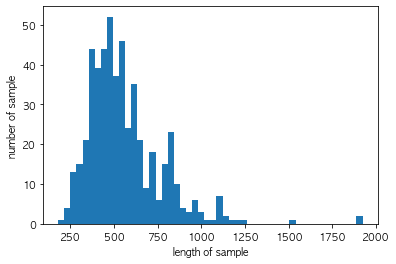

In [70]:
# 정해줄 길이를 찾기 위해 가장 긴 리뷰 길이 확인
max_length = max(len(l) for l in encoded)
print('가사의 최대 길이 : %d' % max_length)
print('가사의 최소 길이 : %d' % min(len(l) for l in encoded))
print('가사의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [71]:
# 문장마다 단어 갯수가 다르므로 sequence padding을 넣어서 문장의 길이 동일하게 만들기 
# 이거하려고 위에서 단어갯수 체크한거임

padding_paragraphs_encoding = keras.preprocessing.sequence.pad_sequences(encoded, maxlen=max_length, padding='post')
padding_paragraphs_encoding

array([[1640, 2006,    0, ...,    0,    0,    0],
       [2017,    0, 1705, ...,    0,    0,    0],
       [1722, 1529,    0, ...,    0,    0,    0],
       ...,
       [ 527,    0, 1924, ...,    0,    0,    0],
       [ 665,    0, 1924, ...,    0,    0,    0],
       [1820, 1648,    0, ...,    0,    0,    0]], dtype=int32)

In [72]:
# print(len(list(padding_paragraphs_encoding)), len(list(padding_paragraphs_encoding)[1]))

In [73]:
categories = train['감정'].to_list()

def category_encode(category):
    if category == 'happy':
        return [1,0,0]
    elif category == 'sad':
        return [0,1,0]
    else:
        return [0,0,1]

In [74]:
encoded_category = [category_encode(category) for category in categories]
encoded_category

[[1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1,

In [75]:
len(encoded_category)

510

---
# 가사 감정 RNN model

In [76]:
# train test data 만들기
from sklearn.model_selection import train_test_split


train_input, test_input, train_target, test_target = train_test_split(
    padding_paragraphs_encoding, encoded_category, test_size=0.2
)

In [77]:
# train val data 만들기
trainData, valData, trainTarget, valTarget = train_test_split(
    train_input, train_target, test_size=0.2
)

In [78]:
import warnings
from tensorflow import keras 

# GPU 사용 설정
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '1'

warnings.filterwarnings('ignore')

In [80]:
# print(train_input.shape, val_input.shape)

In [81]:
model = keras.Sequential()
# 문맥 생성 단계
model.add(keras.layers.Embedding(vocab_size,5,input_length=max_length)) 
# one hot encoding 만드는 애
# Embedding(중복 없는 전체 단어 갯수,index,가장 간 문장의 단어 갯수 )
# 임베딩 레이어는 인덱스를 받아 5차원 벡터의 임베딩을 출력합니다.
model.add(keras.layers.LSTM(128))

# 분류 단계
model.add(keras.layers.Dense(64,activation='relu'))
# model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.Dense(3,activation='softmax'))

In [82]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [83]:
import numpy as np

In [84]:
train_x = np.array(train_input)
train_y = np.array(train_target)

In [85]:
val_x = np.array(valData)
val_y = np.array(valTarget)

In [86]:
print(train_x.shape)
print(train_y.shape)

(408, 1924)
(408, 3)


In [87]:
print(val_x.shape)
print(val_y.shape)

(82, 1924)
(82, 3)


In [88]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1924, 5)           65575     
                                                                 
 lstm (LSTM)                 (None, 128)               68608     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 142,634
Trainable params: 142,634
Non-trainable params: 0
_________________________________________________________________


In [89]:
history = model.fit(
    train_x,
    train_y,
    epochs=100,
    #batch_size=64, # mini batch 경사 하강법
    validation_data = (val_x, val_y),
    # callbacks = [checkpoint_cb, early_stopping_cb]
)

Epoch 1/100


2022-08-08 13:36:53.647977: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


13/13 [==============================] - 14s 970ms/step - loss: 1.0994 - accuracy: 0.3137 - val_loss: 1.0981 - val_accuracy: 0.3780
Epoch 2/100
13/13 [==============================] - 11s 874ms/step - loss: 1.0989 - accuracy: 0.3407 - val_loss: 1.0973 - val_accuracy: 0.3780
Epoch 3/100
13/13 [==============================] - 11s 870ms/step - loss: 1.0993 - accuracy: 0.3137 - val_loss: 1.0991 - val_accuracy: 0.3049
Epoch 4/100
13/13 [==============================] - 11s 877ms/step - loss: 1.0983 - accuracy: 0.3407 - val_loss: 1.0985 - val_accuracy: 0.3049
Epoch 5/100
13/13 [==============================] - 11s 872ms/step - loss: 1.0987 - accuracy: 0.3162 - val_loss: 1.0974 - val_accuracy: 0.3780
Epoch 6/100
13/13 [==============================] - 11s 872ms/step - loss: 1.0985 - accuracy: 0.3407 - val_loss: 1.0978 - val_accuracy: 0.3780
Epoch 7/100
13/13 [==============================] - 11s 879ms/step - loss: 1.0986 - accuracy: 0.3407 - val_loss: 1.0975 - val_accuracy: 0.3780
Epoc

In [90]:
print("accuracy :" , np.mean(history.history['accuracy']))
print("val_accuracy :" , np.mean(history.history['val_accuracy']))

accuracy : 0.32970587521791456
val_accuracy : 0.3414634168148041


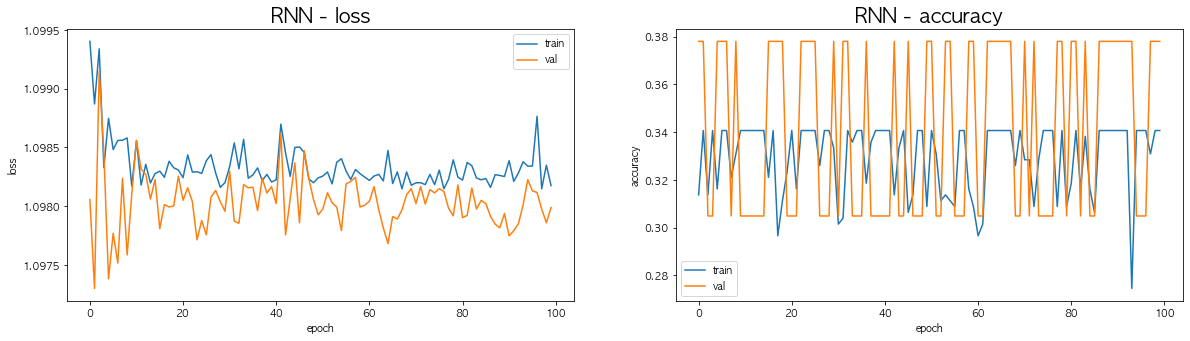

In [91]:
# 시각화 해보기
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(1,2,1) # 1행 2열의 첫번째다.
ax2 = fig.add_subplot(1,2,2) # 1행 2열의 두번째다.

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])

ax1.set_xlabel('epoch')
ax2.set_xlabel('epoch')

ax1.set_ylabel('loss')
ax2.set_ylabel('accuracy')

ax1.legend(['train','val'])
ax2.legend(['train','val'])


ax1.set_title("RNN - loss", size=20)
ax2.set_title("RNN - accuracy", size=20)
plt.show()